# Oscillation, Waves and Optics Question 19
A particular wavepacket can represented by a sum of travelling waves with different amplitudes, all with wavevectors close in magnitude to the central wavevector $k_0$:
$$
\psi(x,t) = \sum_{m=-m_0}^{m_0}\exp\left[-\frac{(k_m-k_0)^2}{2\sigma_k^2}\right]\cos\left[k_mx-\omega_m t\right].
$$
The dispersion relation $\omega(k)$ for this wavesystem is
$$
\omega(k) = ck+dk^3.
$$
and the wavevector of the $m$’th component is $k_m = k_0 + m\Delta k$.

## Part 1
Using the values $k_0 = 1\ {\rm m^{−1}}$ (i.e. a central wavelength of $2\pi m$), $\sigma_k = k_0/10$, $\Delta k = \sigma_k/10$, $c = 1\ {\rm ms^{−1}}$, $d = 0$ (i.e. no dispersion), $m_0 = 30$, use Python (or another language such as Matlab) to calculate and plot the disturbance at times $t =0\ {\rm s}$, $100\ {\rm s}$, $200\ {\rm s}$, and $300\ {\rm s}$.

Repeat the plots with differing amounts of dispersion (e.g. $d = 0.1\ {\rm m^3 s^{−1}}$, $d = −0.1\ {\rm m^3 s^{−1}}$, $d = 0.2\ {\rm m^3 s^{−1}}$, $d = −0.2\ {\rm m^3 s^{−1}}$) and describe the results qualitatively, and where possible quantitatively. In particular, discuss the speed at the which the packet propagates, and the rate at which is spreads.

In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# d = 0 means no dispersion

# define the function of the gaussian wave packet
def gaussian_wave_packet(d, t):
    # define the parameters
    k_0 = 1 # per meters
    sigma_k = k_0/10 # per meters
    delta_k = sigma_k/10 # per meters
    c = 1 # per meters/second
    m_0 = 30

    x = np.linspace(-50, 650, 7000)
    psi = np.zeros(len(x))

    for m in range(-m_0, m_0+1):
        k_m = k_0 + m*delta_k
        omega_m = c*k_m + d*k_m**3
        psi_m = np.exp(-(k_m-k_0)**2/(2*sigma_k**2))*np.cos((k_m*x - omega_m*t))
        psi = psi + psi_m

    return x, psi

def plot_wave_packet(d, t):
    plt.figure(figsize=(16, 9))

    for times in t:
        x, psi = gaussian_wave_packet(d, times)
        plt.plot(x, psi, label=f't = {times} s')

    plt.xlabel(r'$x$ [m]')
    plt.ylabel(r'$\psi(x,t)$')
    plt.title(f'Wave packet with d = {d}')
    plt.legend(loc = 'upper right')
    plt.show()

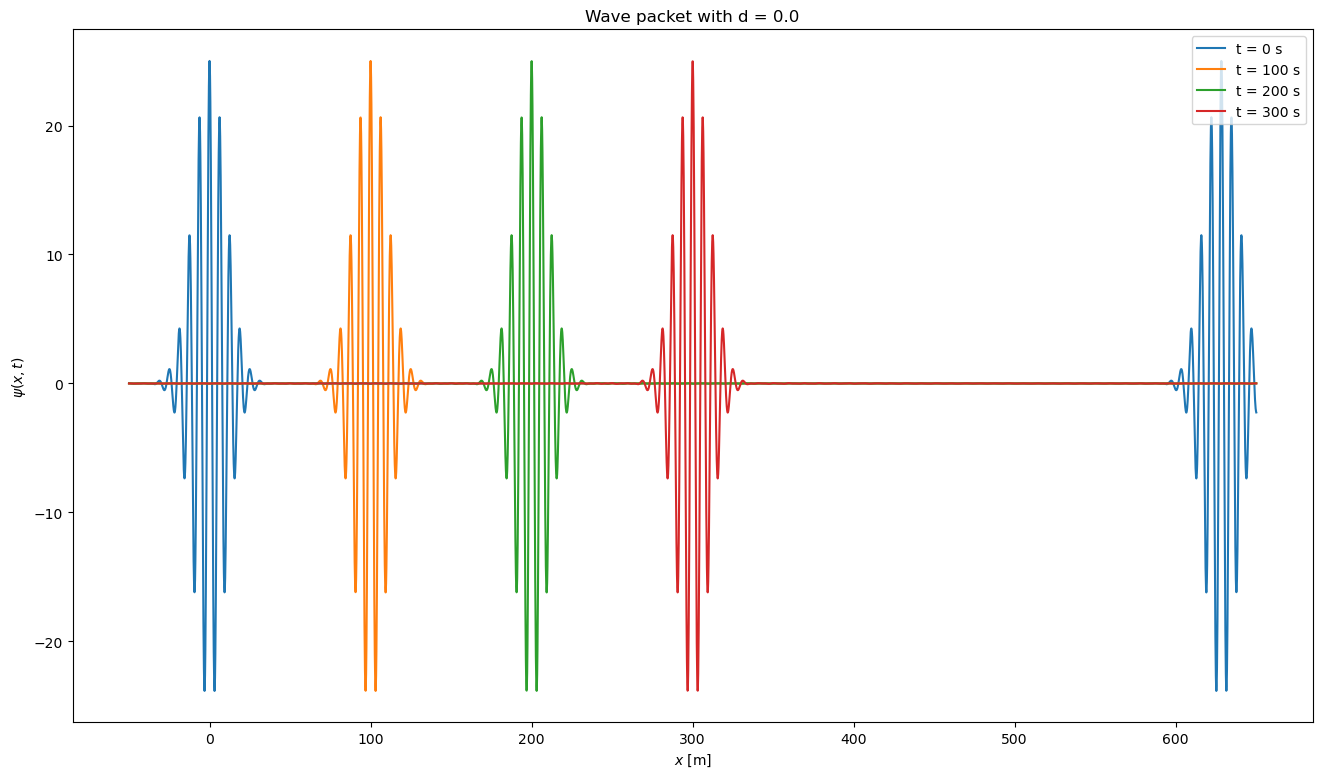

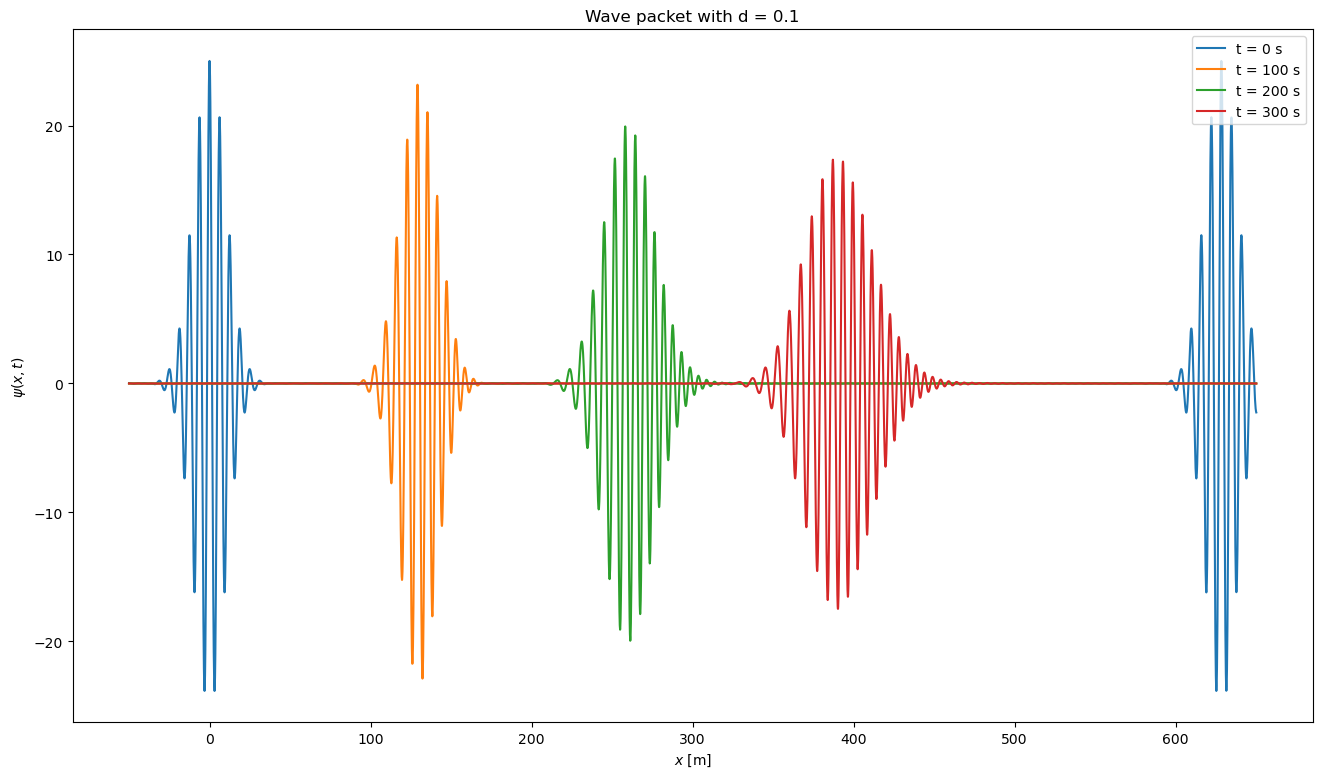

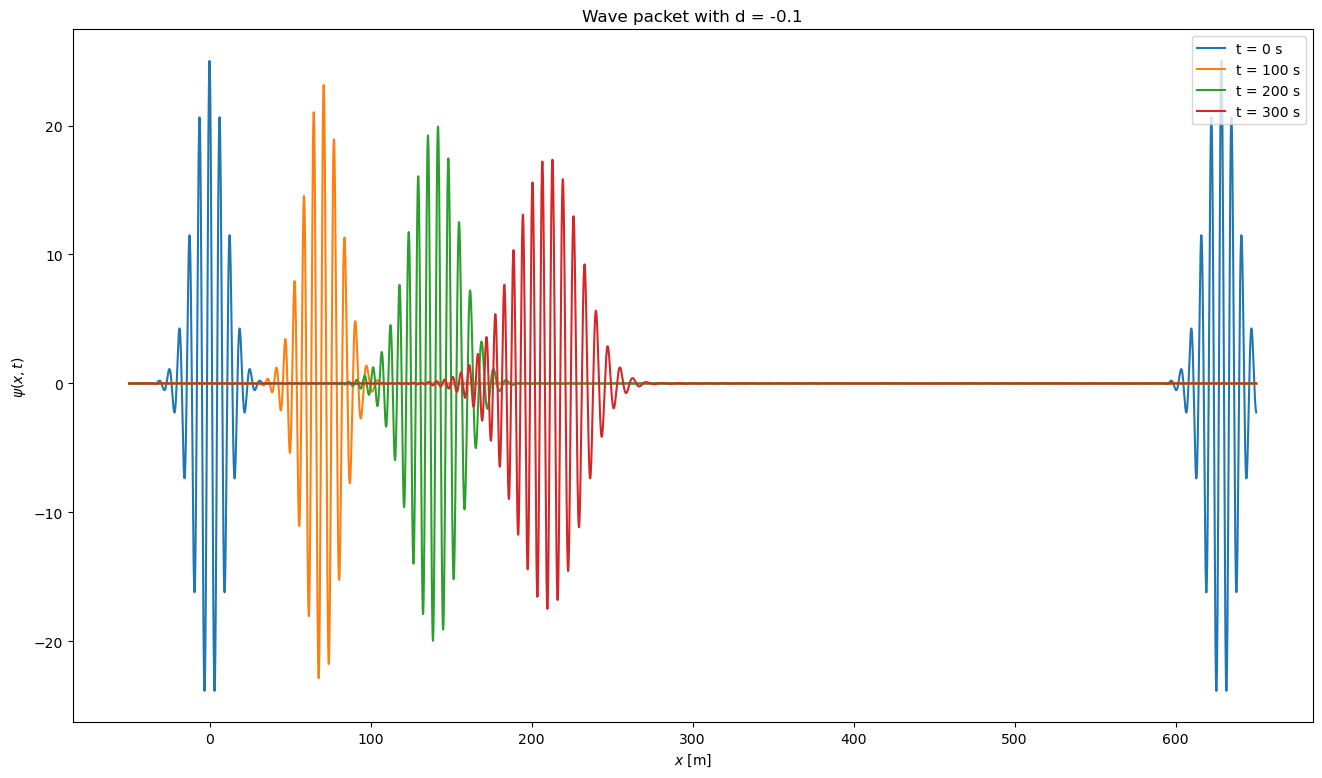

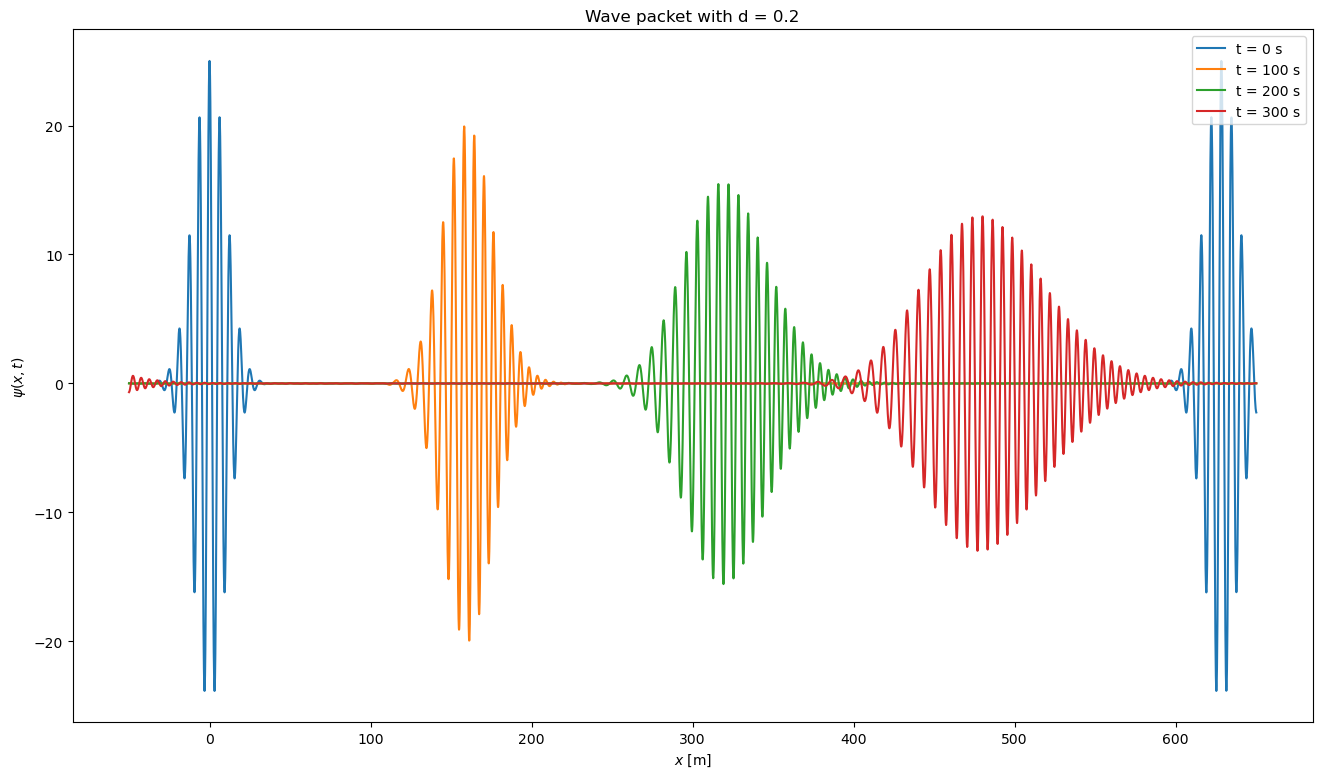

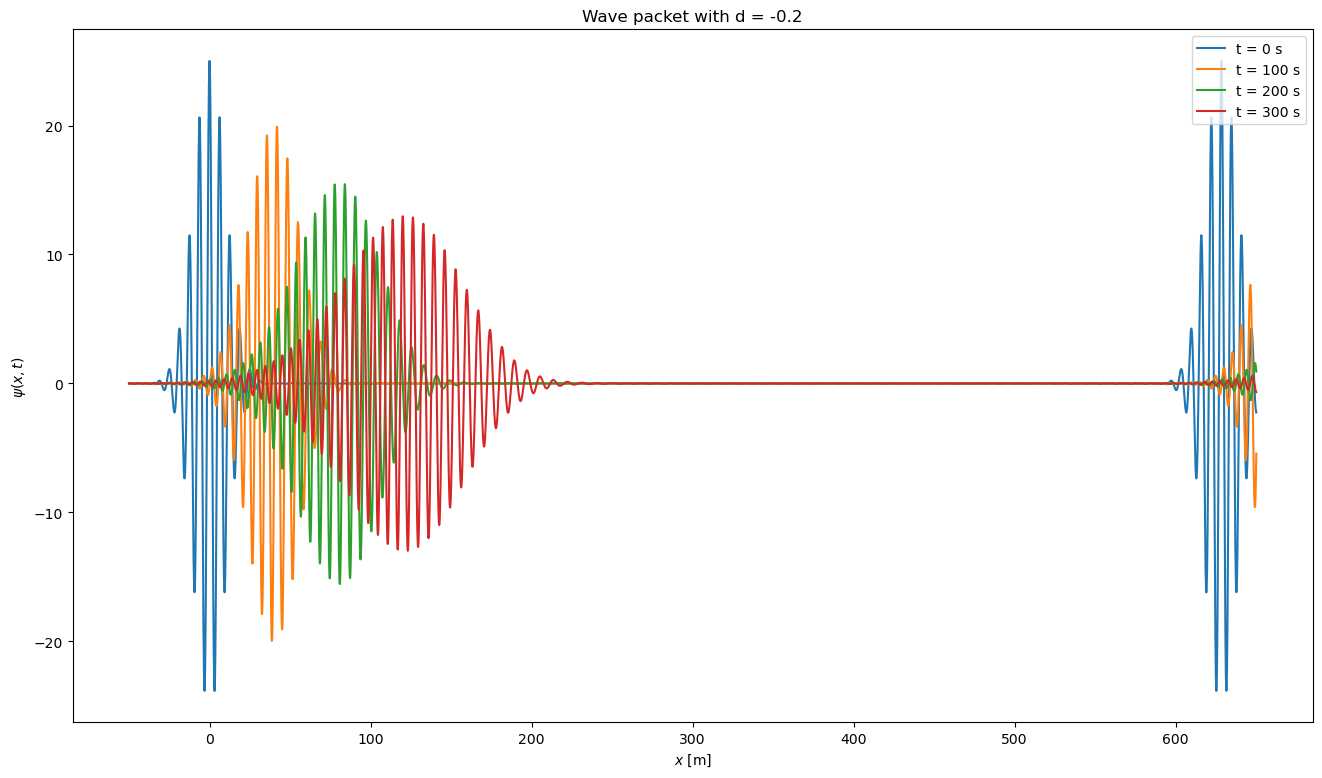

In [2]:
ts = np.array([0, 100, 200, 300])
ds = np.array([0, 0.1, -0.1, 0.2, -0.2])
for d in ds:
    plot_wave_packet(d = d, t = ts)

## Comments:
+ In a non-dispersive medium, the wave packet propagates at constant speed without changing shape. 
+ In a dispersive medium ($d>0$), the wave packet propagates faster, intensity smaller, and shape wider. But the total energy of the wave packet remains constant. 
+ In a dispersive medium ($d<0$), the wave packet propagates slower, intensity smaller, and shape wider. But the total energy of the wave packet remains constant. 
+ In the limit $t\rightarrow\infty$, the wave packet becomes a sinusoidal wave with intensity $I\propto A^2\rightarrow 0$. 

## Part 2:
Only attempt this if you enjoyed part (a)! 

A travelling square wave can be modelled as a Fourier series:
$$
\psi(x,t) = \cos[k_0x-\omega(k_0)t] -\frac{1}{3}\cos[3k_0x-\omega(3k_0)t] + \frac{1}{5}\cos[5k_0x-\omega(5k_0)t] + \cdots,
$$
or, truncating after $m_0 + 1$ terms, we have:
$$
\psi(x,t) \simeq \sum_{m=0}^{m_0}\frac{(-1)^m}{2m+1}\cos[k_mx - \omega(k_m)t].
$$
The dispersion relation $\omega(k)$ for this system is taken to be $\omega = ck + dk^3$, and the wavevector of the $m$’th component wave is $k_m = (2m + 1)k_0$. Using the values $k_0 = 1\ {\rm m^{−1}}$, $c = 1\ {\rm ms^{−1}}$, $d = 0$ (i.e. no dispersion), $m_0 = 10$, use Python (or Matlab) to calculate and plot the disturbance at times $t = 0$, $t = \pi\ {\rm s}$, $t = 2\pi\ {\rm s}$. Repeat the plots with differing amounts of dispersion ($d =0.001\ {\rm m^3 s^{−1}}$, $−0.001\ {\rm m^3 s^{−1}}$, $0.02\ {\rm m^3 s^{−1}}$ and $0.05\ {\rm m^3 s^{−1}}$) and describe the results qualitatively, and where possible quantitatively. Explain how these results relate to the design of digital communication systems.

In [3]:
# define the function of the gaussian wave packet
def square_wave(d, t):
    # define the parameters
    k_0 = 1 # per meters
    c = 1 # per meters/second
    m_0 = 10

    x = np.linspace(0, 20, 2000)
    psi = np.zeros(len(x))

    for m in range(0, m_0+1):
        k_m = (2*m + 1) * k_0
        omega_m = c*k_m + d*k_m**3
        psi_m = ((-1)**m/(2*m + 1)) * np.cos(k_m * x - omega_m * t)
        psi = psi + psi_m

    return x, psi

def plot_square_wave(d, t):
    plt.figure(figsize=(16, 9))

    for times in t:
        x, psi = square_wave(d, times)
        plt.plot(x, psi, label=f't = {times} s')

    plt.xlabel(r'$x$ [m]')
    plt.ylabel(r'$\psi(x,t)$')
    plt.title(f'Square wave with d = {d}')
    plt.legend(loc = 'upper right')
    plt.show()

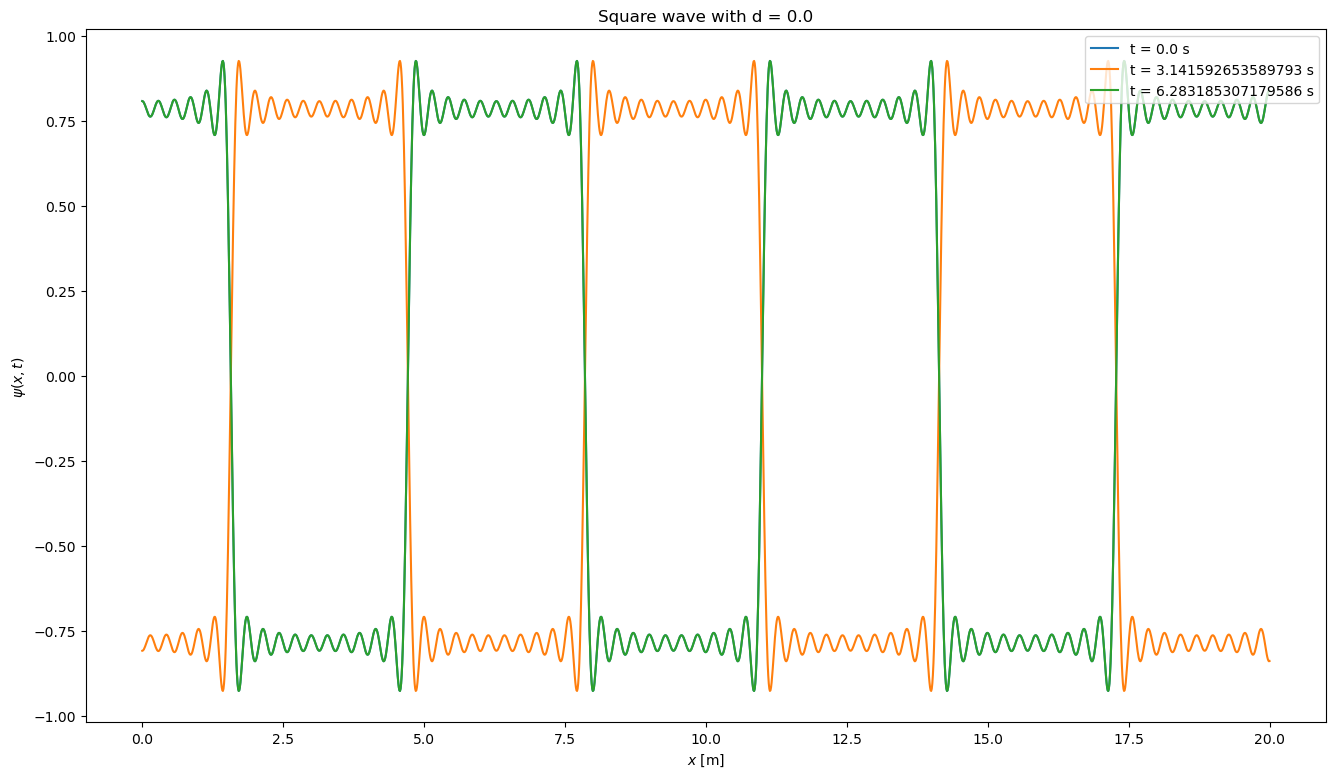

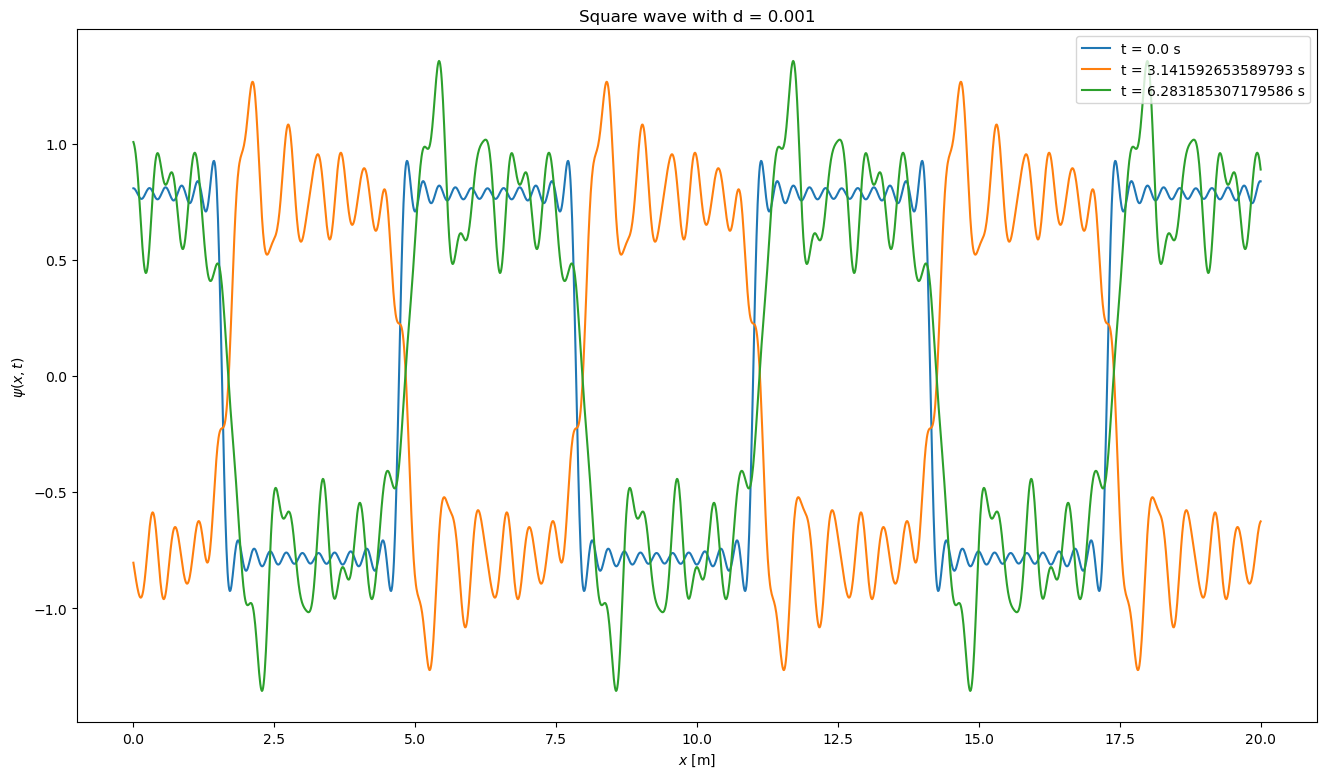

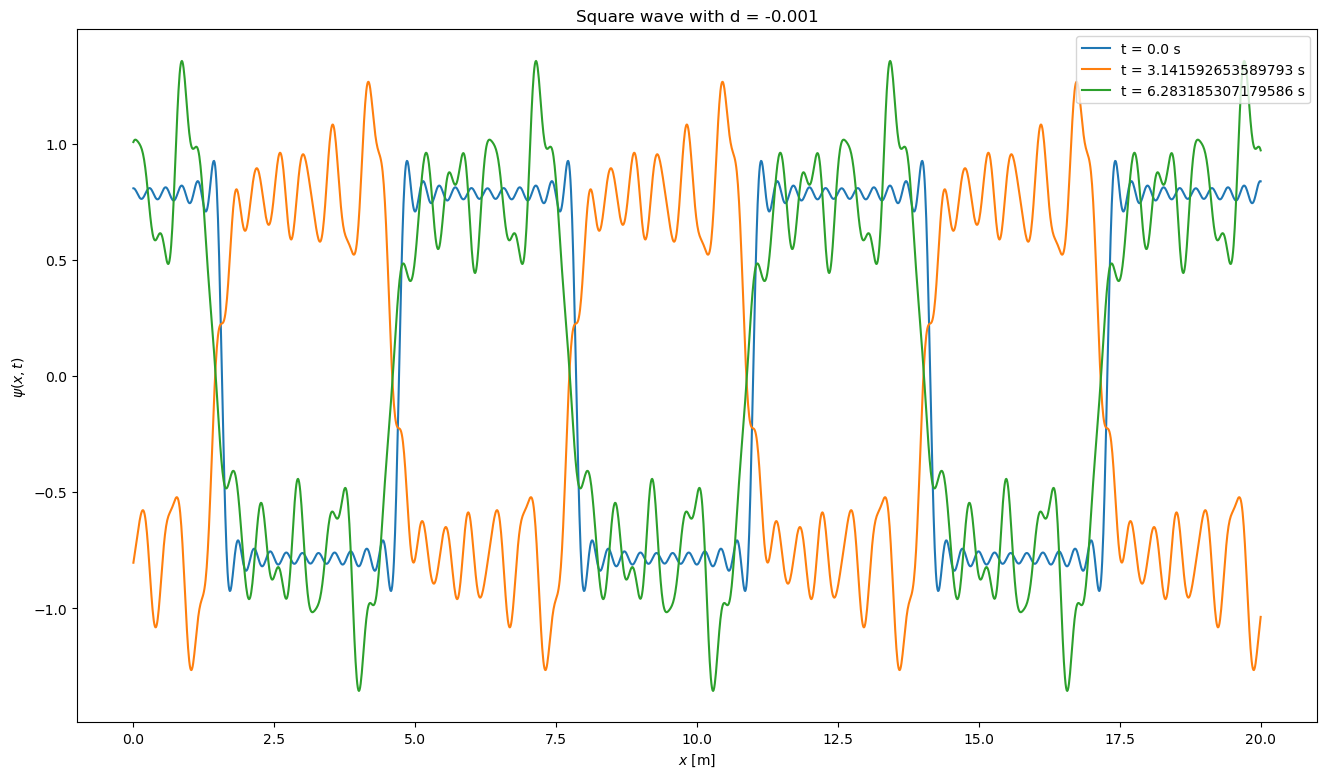

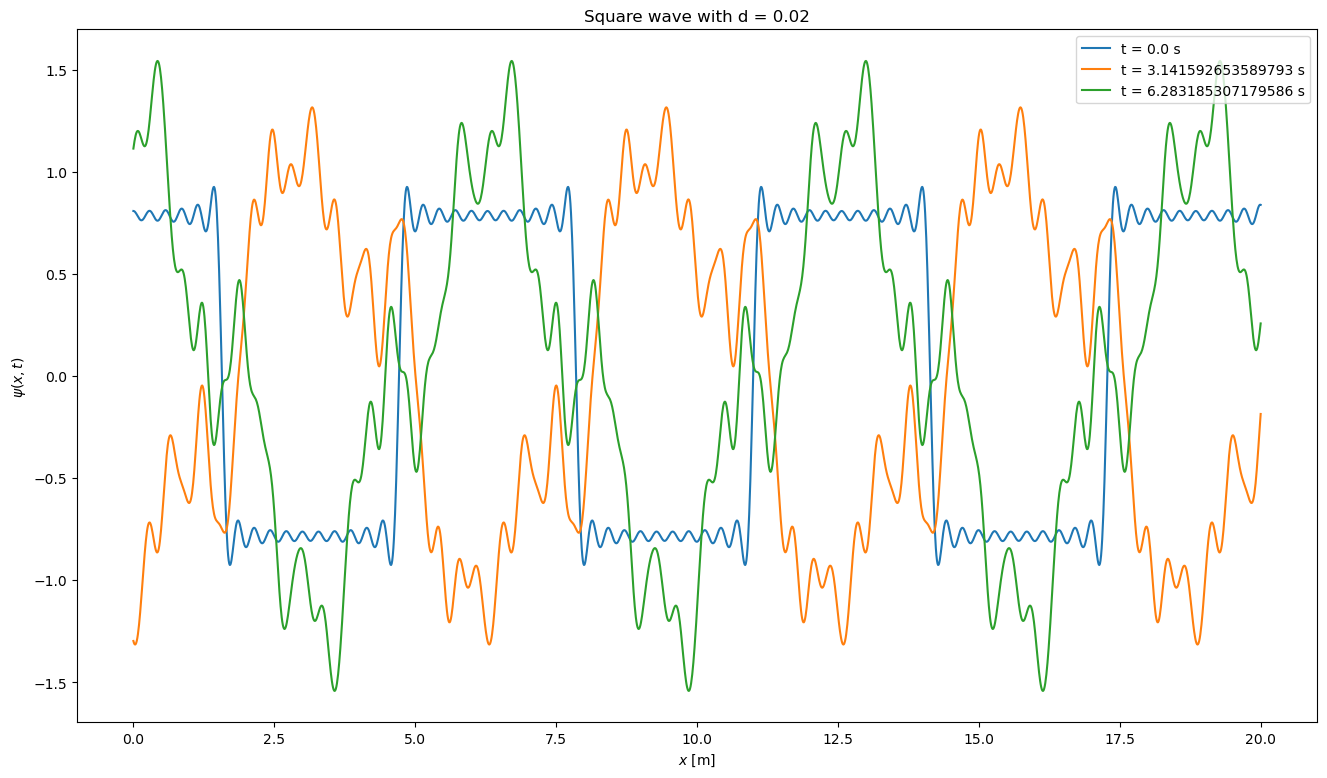

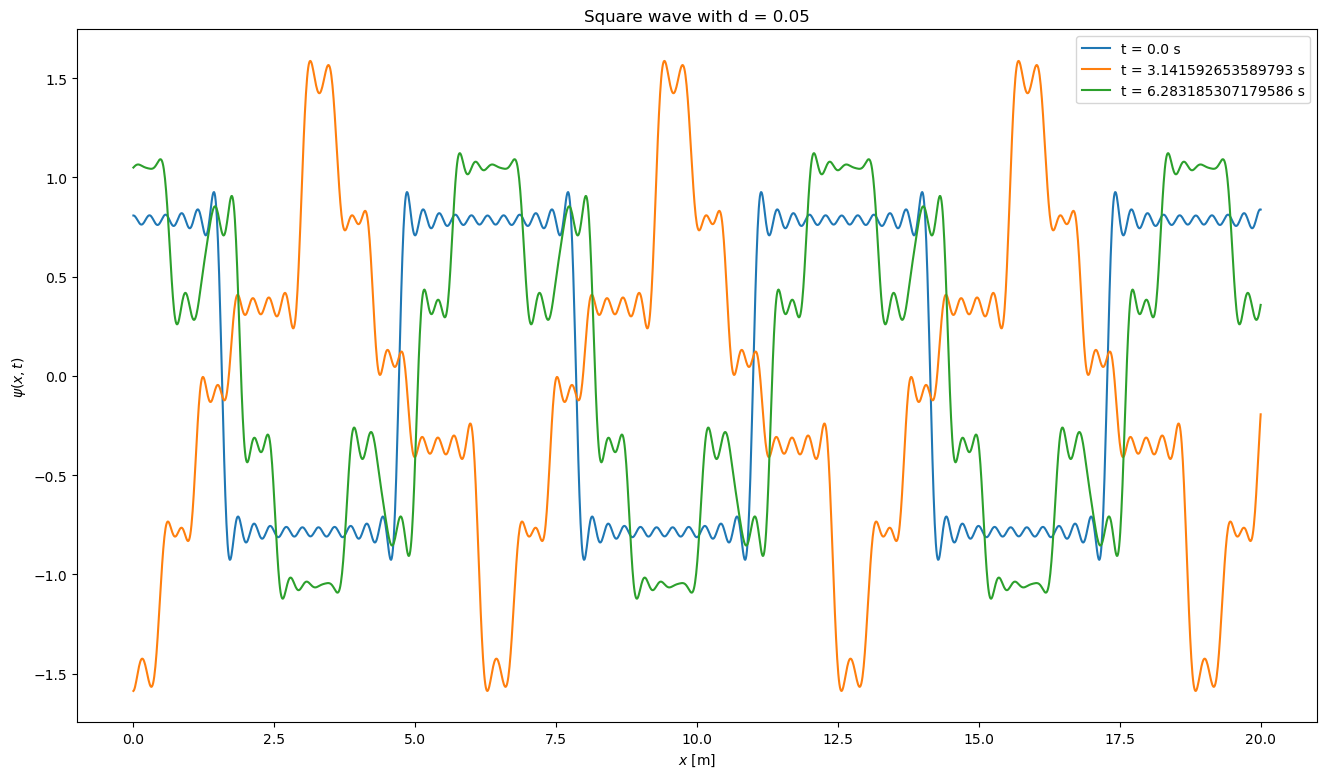

In [4]:
ts = np.array([0, np.pi, 2*np.pi])
ds = np.array([0, 0.001, -0.001, 0.02, 0.05])
for d in ds:
    plot_square_wave(d = d, t = ts)

## Comments:
+ The plots may look chaotic, but they do make sense. 
+ In the first plot, curves for $t=0$ and $t=2\pi\ {\rm s}$ are exactly the same, because the medium is not dispersive. 
+ For those that are dispersive and have $d>0$, waves of higher wavenumber $k$ moves faster, but the peak moves slower. 
+ $d<0$, the opposite. 
+ The change of waveform is not periodic because one can't find another time when every $\cos$ term is in phase with each other. 